# Exam Period Coffee Spending Analysis

# Coffee Transaction Analysis During Exam Periods

This analysis investigates whether coffee transaction frequency increases during midterm and final exam periods. We'll analyze personal spending data to determine if exam periods have a significant impact on coffee consumption patterns.

## Hypothesis
- **H0 (Null)**: No significant difference in coffee transaction frequency between exam and normal periods
- **H1 (Alternative)**: Exam periods have a significant impact on coffee transaction frequency

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

## Data Preparation

We'll process the transaction data following these steps:
1. Read personal bank statement data
2. Filter for coffee-related transactions
3. Track transactions by vendor
4. Identify transactions during exam periods

In [2]:

df = pd.read_excel("yeni.xlsx", sheet_name="Sheet1", engine="openpyxl")


coffee_keywords = ["starbucks", "espresso", "coffy", "yukselen","SABANCI UNIVERSITESI TEMASSIZ".lower()]

brand_count = {
    "Starbucks":0,
    "EspressoLab":0,
    "Coffy":0,
    "Fasshane":0
    }

for a in df['Açıklama']:
  if a.lower().find('starbucks')!=-1:
    brand_count['Starbucks']+=1
  elif a.lower().find('espresso')!=-1:
    brand_count['EspressoLab']+=1
  elif a.lower().find('coffy')!=-1 or a.lower().find("SABANCI UNIVERSITESI TEMASSIZ".lower())!=-1 :
    brand_count['Coffy']+=1
  elif 'YUKSELEN' in a:
    brand_count['Fasshane']+=1


df["IsCoffee"] = df["Açıklama"].apply(
    lambda x: any(keyword.lower() in str(x).lower() for keyword in coffee_keywords)
)


df_coffee = df[df["IsCoffee"] == True]

print(f"Total coffee transactions:{len(df_coffee)} ")


Total coffee transactions:234 


## Exam Period Definition

We'll calculate the total number of exam days based on the university's academic calendar. This includes:
- First Final: January 8-20, 2023
- First Midterm: April 11-24, 2023
- Second Final: May 30 - June 11, 2023
And subsequent exam periods through January 2025.

In [3]:

def calculate_num_of_exam_days():
  exam_periods = [
        ("2023-01-08", "2023-01-20"),
        ("2023-04-11", "2023-04-24"),
        ("2023-05-30", "2023-06-11"),
        ("2023-11-06", "2023-11-18"),
        ("2024-01-05", "2024-01-19"),
        ("2024-03-22", "2024-04-03"),
        ("2024-05-29", "2024-06-09"),
        ("2024-11-01", "2024-11-16"),
        ("2024-11-29", "2024-12-14"),
        ("2025-01-01", "2025-01-12")
    ]
  total_exam_days = 0
  for start_date_str, end_date_str in exam_periods:
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    num_days = (end_date - start_date).days + 1
    total_exam_days += num_days
  return total_exam_days

exam_total = calculate_num_of_exam_days()
print(f"Total exam days: {exam_total}")


Total exam days: 137


## Total Day Of Exam and Normal Period Calculations

In [4]:
exam_periods = [
    ("2023-01-08", "2023-01-20"),
    ("2023-04-11", "2023-04-24"),
    ("2023-05-30", "2023-06-11"),
    ("2023-11-06", "2023-11-18"),
    ("2024-01-05", "2024-01-19"),
    ("2024-03-22", "2024-04-03"),
    ("2024-05-29", "2024-06-09"),
    ("2024-11-01", "2024-11-16"),
    ("2024-11-29", "2024-12-14"),
    ("2025-01-01", "2025-01-12")
]

exam_total = calculate_num_of_exam_days()
normal_total = 732
non_exam_total = 732 - exam_total

print(f"Total days: {normal_total}")
print(f"Total exam days: {exam_total}")
print(f"Total non-exam days: {non_exam_total}")


Total days: 732
Total exam days: 137
Total non-exam days: 595


## Total Transaction Of Exam and Normal Period Calculations

In [5]:

def in_exam_period(date, periods):
  date = pd.to_datetime(date)
  for start, end in periods:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    if start_date <= date <= end_date:
      return "Exam"
  return "Normal"

df["Period_Type"] = df["Tarih"].apply(lambda d: in_exam_period(d, exam_periods))
coffee_transactions = (df[df['IsCoffee'] == True])
df_exam = coffee_transactions[coffee_transactions["Period_Type"] == "Exam"]
df_normal = coffee_transactions[coffee_transactions["Period_Type"] == "Normal"]

print(f"Coffe transactions during exam period: {len(df_exam)}")
print(f"Coffe transactions during normal period: {len(df_normal)}")

C:\Users\omere\AppData\Local\Temp\ipykernel_27580\2306816273.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date = pd.to_datetime(date)


Coffe transactions during exam period: 52
Coffe transactions during normal period: 182


## Statistical Analysis

We'll perform a chi-squared test to evaluate whether there's a significant difference in coffee transaction frequency between exam and normal periods. This will help us test our hypothesis about exam period effects on coffee consumption.

In [6]:
exam_count = df[df["Period_Type"] == "Exam"].shape[0]
normal_count = df[df["Period_Type"] == "Normal"].shape[0]
A = exam_count
B = A - exam_total
C = normal_count
D = C - normal_total

contingency_table = np.array([[A, B], [C, D]])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square:", chi2)
print("p-value:", p)

Chi-Square: 2.3238578479743786
p-value: 0.12740370338717186


## P-Value Analysis
- As the p - value of my statistical research is bigger than 0.05 ([level of significance](https://www.britannica.com/topic/statistical-significance) ) I am failed to reject **H0** (_The Null Hypothesis_ ).

This statistics shows there are no relation between my coffee consumption and my exam periods.

# Visualization Analysis

#### We'll create several visualizations to analyze the data:
####    1. Bar plot comparing exam vs normal period transactions
####    2. Transaction distribution by coffee vendor
####    3. Monthly transaction trends
####    4. Yearly spending analysis

## First Graph: Transactions and Period Days
The graph compares coffee transactions and the number of days during exam and non-exam periods. The bar chart represents the total coffee transactions for each period, while the dot plot highlights the total number of days in each period.

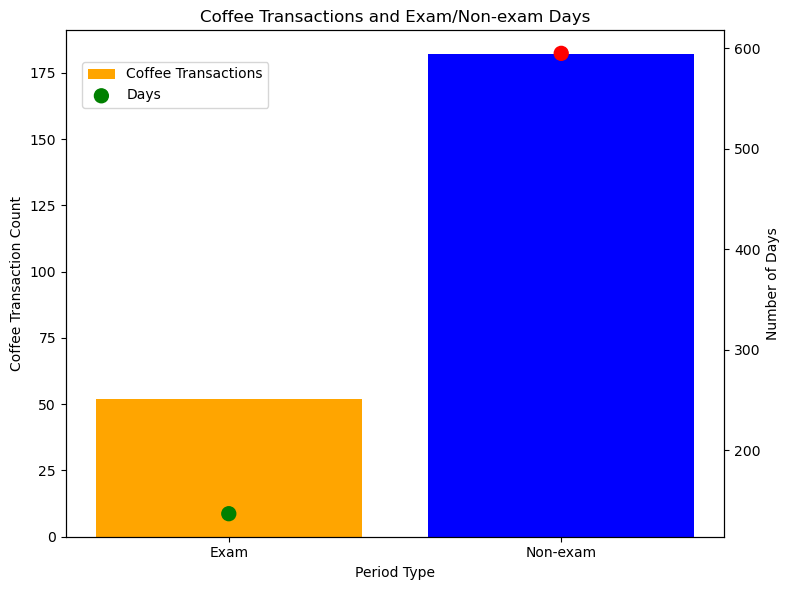

Coffe transactions during exam period / Total exam days : 52 / 137 = 0.3802281368821293
Coffe transactions during normal period / Total non-exam days : 182 / 595= 0.3058103975535168


In [7]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Period_Type": ["Exam", "Non-exam"],
    "Coffee_Transactions": [52, 182],
    "Days": [137, 595]
}


coffee_transactions = pd.DataFrame(data)


coffee_counts = coffee_transactions["Coffee_Transactions"]
days = coffee_transactions["Days"]
period_types = coffee_transactions["Period_Type"]


fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.bar(period_types, coffee_counts, color=["orange", "blue"], label="Coffee Transactions")
ax1.set_xlabel("Period Type")
ax1.set_ylabel("Coffee Transaction Count", color="black")
ax1.tick_params(axis='y', labelcolor="black")
ax1.set_title("Coffee Transactions and Exam/Non-exam Days")


ax2 = ax1.twinx()
ax2.scatter(period_types, days, color=["green", "red"], s=100, label="Days", marker='o')
ax2.set_ylabel("Number of Days", color="black")
ax2.tick_params(axis='y', labelcolor="black")

fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))


plt.tight_layout()
plt.show()
formatted_number = "%.2f" % (exam_total / len(df_exam))
formatted_number2 = "%.2f" % (non_exam_total / len(df_normal))
print(f"Coffe transactions during exam period / Total exam days : {len(df_exam)} / {exam_total} ="+" "+ str(1/float(formatted_number)))
print(f"Coffe transactions during normal period / Total non-exam days : {len(df_normal)} / {non_exam_total}="+" "+ str(1/float(formatted_number2)))


- The graph above demonstrates coffee transactions and the number of days during exam and non-exam periods. The ratio of transactions to days for both periods is very similar. This indicates that the average daily coffee transactions remain consistent across periods, suggesting no significant difference or impact of exam days on coffee consumption behavior.

## Second Graph: Plot of Transactions
This code generates a Dot plot visualizing coffee transactions over time. It distinguishes transactions occurring during exam and normal periods by using different colors: red for exam periods and blue for normal periods.

C:\Users\omere\AppData\Local\Temp\ipykernel_27580\2415124796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee["Transaction_Date"] = pd.to_datetime(df_coffee["Tarih"], format="%d.%m.%Y")
C:\Users\omere\AppData\Local\Temp\ipykernel_27580\2415124796.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee["Jitter"] = np.random.uniform(0.7, 1.3, size=len(df_coffee))


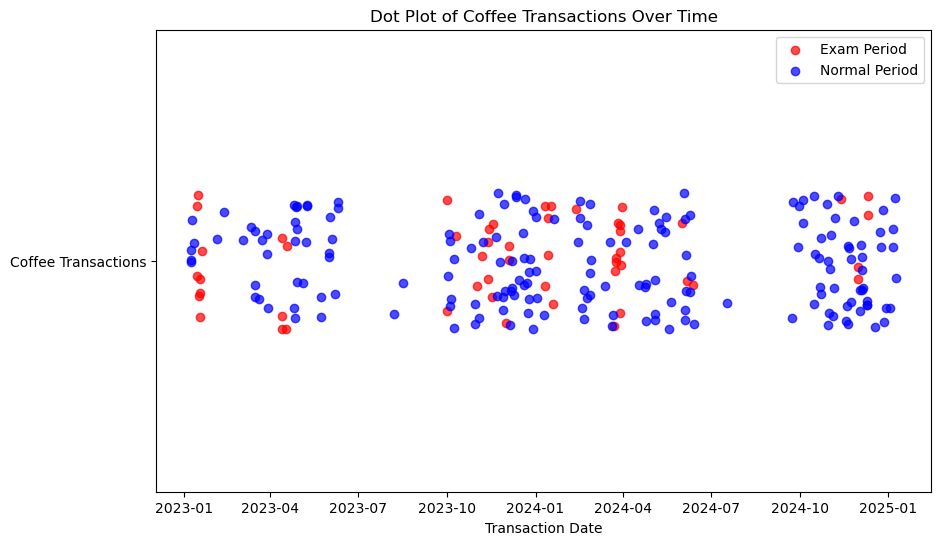

In [8]:

df_coffee = (df[df['IsCoffee'] == True])
df_coffee["Transaction_Date"] = pd.to_datetime(df_coffee["Tarih"], format="%d.%m.%Y")


np.random.seed(42)
df_coffee["Jitter"] = np.random.uniform(0.7, 1.3, size=len(df_coffee))

df_exam = df_coffee[df_coffee["Period_Type"] == "Exam"]
df_normal = df_coffee[df_coffee["Period_Type"] == "Normal"]


plt.figure(figsize=(10, 6))


plt.scatter(
    df_exam["Transaction_Date"],
    df_exam["Jitter"],
    color="red",
    alpha=0.7,
    label="Exam Period"
)


plt.scatter(
    df_normal["Transaction_Date"],
    df_normal["Jitter"],
    color="blue",
    alpha=0.7,
    label="Normal Period"
)


plt.title("Dot Plot of Coffee Transactions Over Time")
plt.xlabel("Transaction Date")

plt.ylim(0, 2)
plt.yticks([1], ["Coffee Transactions"])

plt.legend()
plt.show()

- The above graph shows that there is no observable difference between the two periods, and the distribution remains consistent throughout.

## Third Graph: Daily Coffee Transactions During Exam and Normal Periods
This graph visualizes the daily coffee transactions separately for exam and normal periods. The red line represents the number of transactions during exam periods, while the blue line shows the transactions during normal periods. Each data point corresponds to the total number of transactions recorded on a particular day, grouped by their respective periods.

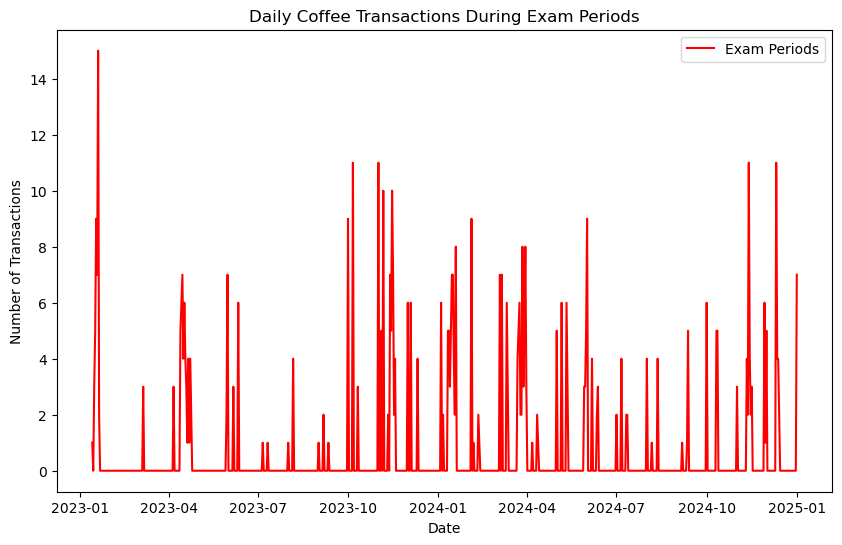

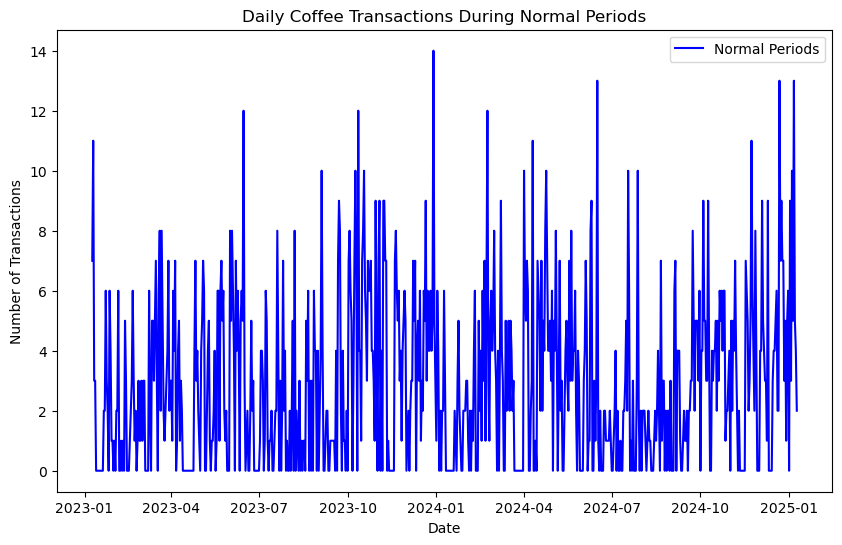

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df["Tarih"] = pd.to_datetime(df["Tarih"], format='%d.%m.%Y')

df["Transaction_Count"] = 1

df_exam = df[df["Period_Type"] == "Exam"]

df_exam_daily = (
    df_exam.groupby(pd.Grouper(key="Tarih", freq="D"))["Transaction_Count"]
    .sum()
    .reset_index()
    .rename(columns={"Transaction_Count": "Exam_Transactions"})
)


plt.figure(figsize=(10, 6))
plt.plot(df_exam_daily["Tarih"], df_exam_daily["Exam_Transactions"], label="Exam Periods", color="red")
plt.title("Daily Coffee Transactions During Exam Periods")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.legend()
plt.show()


df_normal = df[df["Period_Type"] == "Normal"]


df_normal_daily = (
    df_normal.groupby(pd.Grouper(key="Tarih", freq="D"))["Transaction_Count"]
    .sum()
    .reset_index()
    .rename(columns={"Transaction_Count": "Normal_Transactions"})
)


plt.figure(figsize=(10, 6))
plt.plot(df_normal_daily["Tarih"], df_normal_daily["Normal_Transactions"], label="Normal Periods", color="blue")
plt.title("Daily Coffee Transactions During Normal Periods")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.legend()
plt.show()


- Looking at the distributions of the above graphs, we can observe once again that the distributions for both periods are similar, with no noticeable differences between them.

# Additional Data Analysis

Although I was not able to reject the null hypothesis (H₀), I continued to examine my data further. In addition to the statistics of my coffee consumption, I also wanted to analyze other topics.

## Favorite Brand

I checked my transactions and found out my favourite brand in campus:

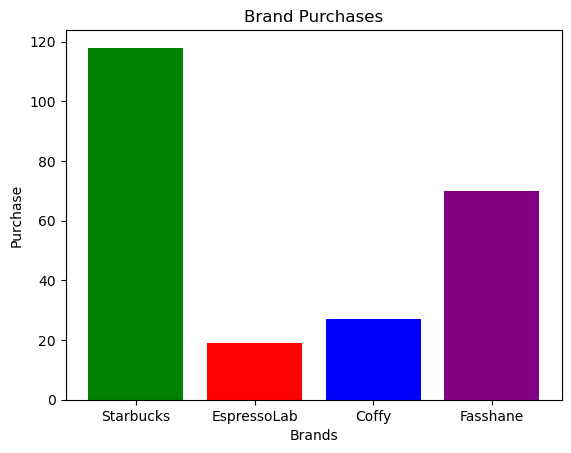

In [10]:
import matplotlib.pyplot as plt
import numpy as np
brands = list(brand_count.keys())
counts = list(brand_count.values())
plt.bar(brands, counts, color=['green', 'red', 'blue', 'purple'])
plt.title('Brand Purchases')
plt.xlabel('Brands')
plt.ylabel('Purchase')
plt.show()

- As it can be observed easily Starbuck is my first choice in coffee usually.

## Seasonal Coffee Consumption
I wondered my habit of coffee consumption through the seasons and months

C:\Users\omere\AppData\Local\Temp\ipykernel_27580\413813760.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee["Month"] = df_coffee["Tarih"].dt.month
C:\Users\omere\AppData\Local\Temp\ipykernel_27580\413813760.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee['Season'] = df_coffee['Month'].apply(get_season)


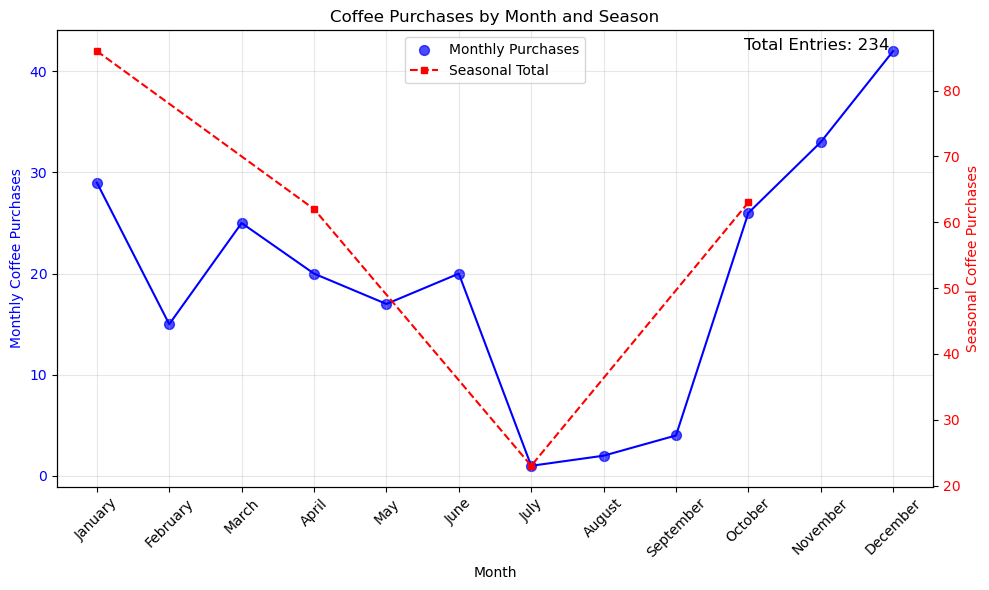

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


df["Tarih"] = pd.to_datetime(df["Tarih"], format="%d.%m.%Y")


coffee_keywords = ["starbucks", "espresso", "coffy", "yukselen", "sabanci universitesi temassiz"]
df_coffee = df[df["Açıklama"].str.lower().str.contains("|".join(coffee_keywords))]
df_coffee["Month"] = df_coffee["Tarih"].dt.month


coffee_counts_by_month = df_coffee.groupby("Month")["Açıklama"].count().reset_index()


def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'


df_coffee['Season'] = df_coffee['Month'].apply(get_season)
seasonal_counts = df_coffee.groupby('Season')['Açıklama'].count()


season_middle_months = {'Winter': 1, 'Spring': 4, 'Summer': 7, 'Fall': 10}
seasonal_counts_plot = pd.Series([
    seasonal_counts['Winter'],
    seasonal_counts['Spring'],
    seasonal_counts['Summer'],
    seasonal_counts['Fall']
], index=[1, 4, 7, 10])


fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()


ax1.scatter(coffee_counts_by_month["Month"], coffee_counts_by_month["Açıklama"], s=50, alpha=0.7, color='blue', label='Monthly Purchases')
ax1.plot(coffee_counts_by_month["Month"], coffee_counts_by_month["Açıklama"], linestyle='-', color='blue')


ax2.plot(season_middle_months.values(), seasonal_counts_plot.values, color='red', linestyle='--', marker='s', markersize=5, label='Seasonal Total')


ax1.set_xlabel("Month")
ax1.set_ylabel("Monthly Coffee Purchases", color='blue')
ax2.set_ylabel("Seasonal Coffee Purchases", color='red')
plt.title("Coffee Purchases by Month and Season")


ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=45)


ax1.grid(True, alpha=0.3)


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center')

ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')


total_entries = len(df_coffee)
plt.text(0.95, 0.95, f"Total Entries: {total_entries}",
         transform=ax1.transAxes,
         ha="right",
         va="bottom",
         fontsize=12)

plt.tight_layout()
plt.show()

- After seeing this graph I have observed that I should have set my hypothesis around the relation between wheather degree and my coffee consumption frequency in the first place.

## Side Project(opsiyonel): Monthly Coffee Spending Analysis
- Null Hypothesis (H₀): There is no inverse relationship between the monthly average temperature and coffee consumption frequency.
- Alternative Hypothesis (HA): There is an inverse relationship between the monthly average temperature and coffee consumption frequency.

I easily reached the data about Istanbul's monthly average temperature by Meteoroloji Genel Müdürlüğü's orignal [website](https://www.mgm.gov.tr/veridegerlendirme/il-ve-ilceler-istatistik.aspx?k=A&m=ISTANBUL). However, the data only shows the data for 1950-2023.Therfore, I checked Türkiye's yearly average temperature increase data from [here](https://www.worlddata.info/asia/turkey/climate.php#:~:text=The%20average%20annual%20temperature%20was,8%20weather%20stations%20in%20Turkey.). Then, I calculated yearly average temperature increase and find the result as 0.0284°C/year so didn't include it.

In [12]:
years_passed=2023-1949
t_change=14.7-12.6
yearly_average = t_change/years_passed

print(format(yearly_average, '.4f'))

monthly_ratios = {
    "January": 6.7,
    "February": 6.9,
    "March": 8.4,
    "April": 12.8,
    "May": 17.6,
    "June": 22.2,
    "July": 24.6,
    "August": 24.7,
    "September": 21.2,
    "October": 16.7,
    "November": 12.6,
    "December": 8.9,
}


0.0284


- Then I calculated my monthly transactions

In [13]:
transaction_counts = (
    df_coffee["Tarih"]
    .dt.month.value_counts()
    .sort_index()
    .reset_index()
)


transaction_counts.columns = ["Month_Number", "Transaction_Count"]
month_names = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}
transaction_counts["Month"] = transaction_counts["Month_Number"].map(month_names)

transaction_counts = transaction_counts[["Month", "Transaction_Count"]]


print(transaction_counts)


        Month  Transaction_Count
0     January                 29
1    February                 15
2       March                 25
3       April                 20
4         May                 17
5        June                 20
6        July                  1
7      August                  2
8   September                  4
9     October                 26
10   November                 33
11   December                 42


- Then I used chi-square and p-value to analyze

In [14]:
from scipy.stats import spearmanr


monthly_ratios = [6.7, 6.9, 8.4, 12.8, 17.6, 22.2, 24.6, 24.7, 21.2, 16.7, 12.6, 8.9]
transaction_count = [29, 15, 25, 20, 17, 20, 1, 2, 4, 26, 33, 42]


correlation, p_value = spearmanr(monthly_ratios, transaction_count)


print("Spearman Correlation:", correlation)
print("p-value:", p_value)


Spearman Correlation: -0.6514896155546621
p-value: 0.0217247350674116


- This indicates that there is a statistically significant inverse relationship between the monthly average temperature and my coffee consumption frequency. (Reject **H0**)

## Average and Total Cost Of Coffee Per Year

The graph compares total coffee spending and average coffee spending over the years 2023 to 2025. The bar chart represents the total coffee spending for each year, while the line plot highlights the average spending per transaction during the same period.

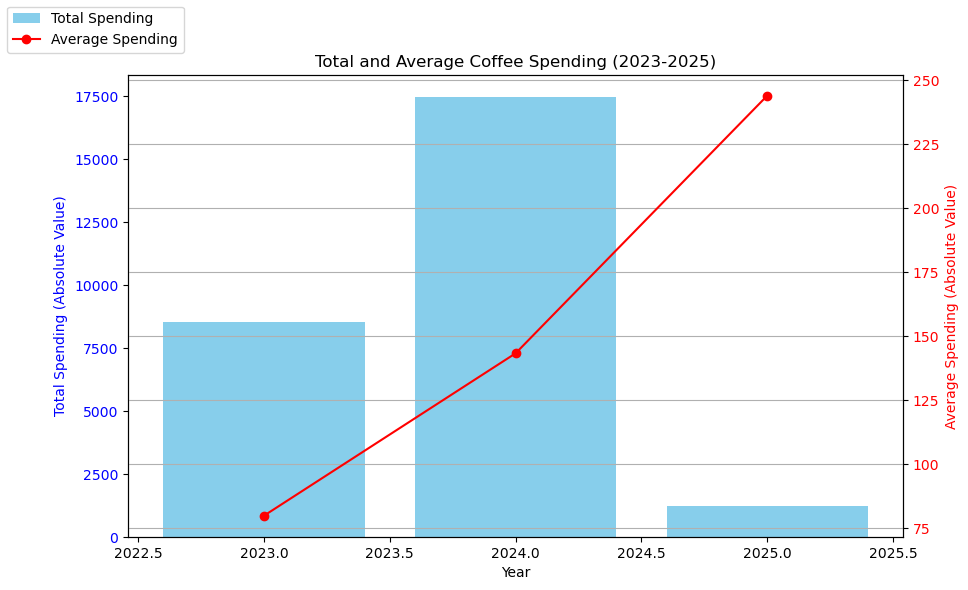

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


df["Tarih"] = pd.to_datetime(df["Tarih"], format="%d.%m.%Y")
df_filtered = df[(df["Tarih"].dt.year >= 2023) & (df["Tarih"].dt.year <= 2025)]


coffee_brands = ["starbucks", "espresso", "coffy", "yukselen", "sabanci universitesi temassiz"]
df_coffee = df_filtered[df_filtered["Açıklama"].str.lower().str.contains("|".join(coffee_brands))]

yearly_data = df_coffee.groupby(df_coffee["Tarih"].dt.year).agg(
    total_cost=("Tutar", "sum"), total_count=("Açıklama", "count")
)


yearly_data["average_cost"] = yearly_data["total_cost"].abs() / yearly_data["total_count"]


fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.bar(yearly_data.index, yearly_data["total_cost"].abs(), color="skyblue", label="Total Spending")
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Spending (Absolute Value)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(yearly_data.index, yearly_data["average_cost"], color="red", marker="o", label="Average Spending")
ax2.set_ylabel("Average Spending (Absolute Value)", color="red")
ax2.tick_params(axis="y", labelcolor="red")


plt.title("Total and Average Coffee Spending (2023-2025)")
fig.legend(loc="upper left")
plt.grid(True)

plt.show()

- This graph helps us to understand that my average spending for coffee is increased throughout the years by some reasons

## Findings and Conclusion

Based on our analysis:
1. Statistical results of my main project show no significant difference in coffee transaction frequency during exam periods (p > 0.05)
2. In the campus, Starbucks is my the most favorite brand for coffee
3. According to my side project results there is an inverse relationship between the monthly average temperature and coffee consumption frequency. (**p < 0.05**)

### Limitations
- My analysis based on my personal data only
- May not be generalizable to broader population
- Limited to specific coffee vendors
- I hid my bank account transaction file as it is my personal data